## Getting the symbol probabilities and analysis

    After getting compression_metrics.csv


In [8]:
import pandas as pd
import csv
from typing import Dict

def parse_symbol_probabilities(prob_string: str) -> Dict[str, float]:
    """
    Parse symbol probability string into a dictionary
    
    Args:
        prob_string (str): Raw probability string
    
    Returns:
        Dict[str, float]: Parsed symbol probabilities
    """
    probabilities = {}
    # Remove trailing semicolon and split
    symbols = prob_string.rstrip('; ').split('; ')
    
    for symbol_prob in symbols:
        symbol, prob_str = symbol_prob.split(':')
        # Remove '%' and convert to float
        prob = float(prob_str.rstrip('%'))
        probabilities[symbol] = prob
    
    return probabilities

def transform_probabilities_to_csv(input_csv: str, output_csv: str):
    """
    Transform input CSV with symbol probabilities to expanded CSV
    
    Args:
        input_csv (str): Input CSV file path
        output_csv (str): Output CSV file path
    """
    # Read input CSV
    df = pd.read_csv(input_csv)
    
    # Process each row's symbol probabilities
    all_symbols = set()
    processed_data = []
    
    for _, row in df.iterrows():
        probabilities = parse_symbol_probabilities(row['Symbol Probabilities'])
        all_symbols.update(probabilities.keys())
        processed_data.append(probabilities)
    
    # Create a new DataFrame with all symbols as columns
    result_df = pd.DataFrame(processed_data, columns=list(all_symbols))
    
    # Add original columns back
    result_df = pd.concat([df.drop('Symbol Probabilities', axis=1), result_df], axis=1)
    
    # Save to new CSV
    result_df.to_csv(output_csv, index=False)
    
    print(f"Transformed CSV saved to {output_csv}")

input_csv = 'compression_metrics.csv'
output_csv = 'expanded_symbol_probabilities.csv'

transform_probabilities_to_csv(input_csv, output_csv)

Transformed CSV saved to expanded_symbol_probabilities.csv


Total Rows in DataFrame: 4
Total Unique Symbols: 54


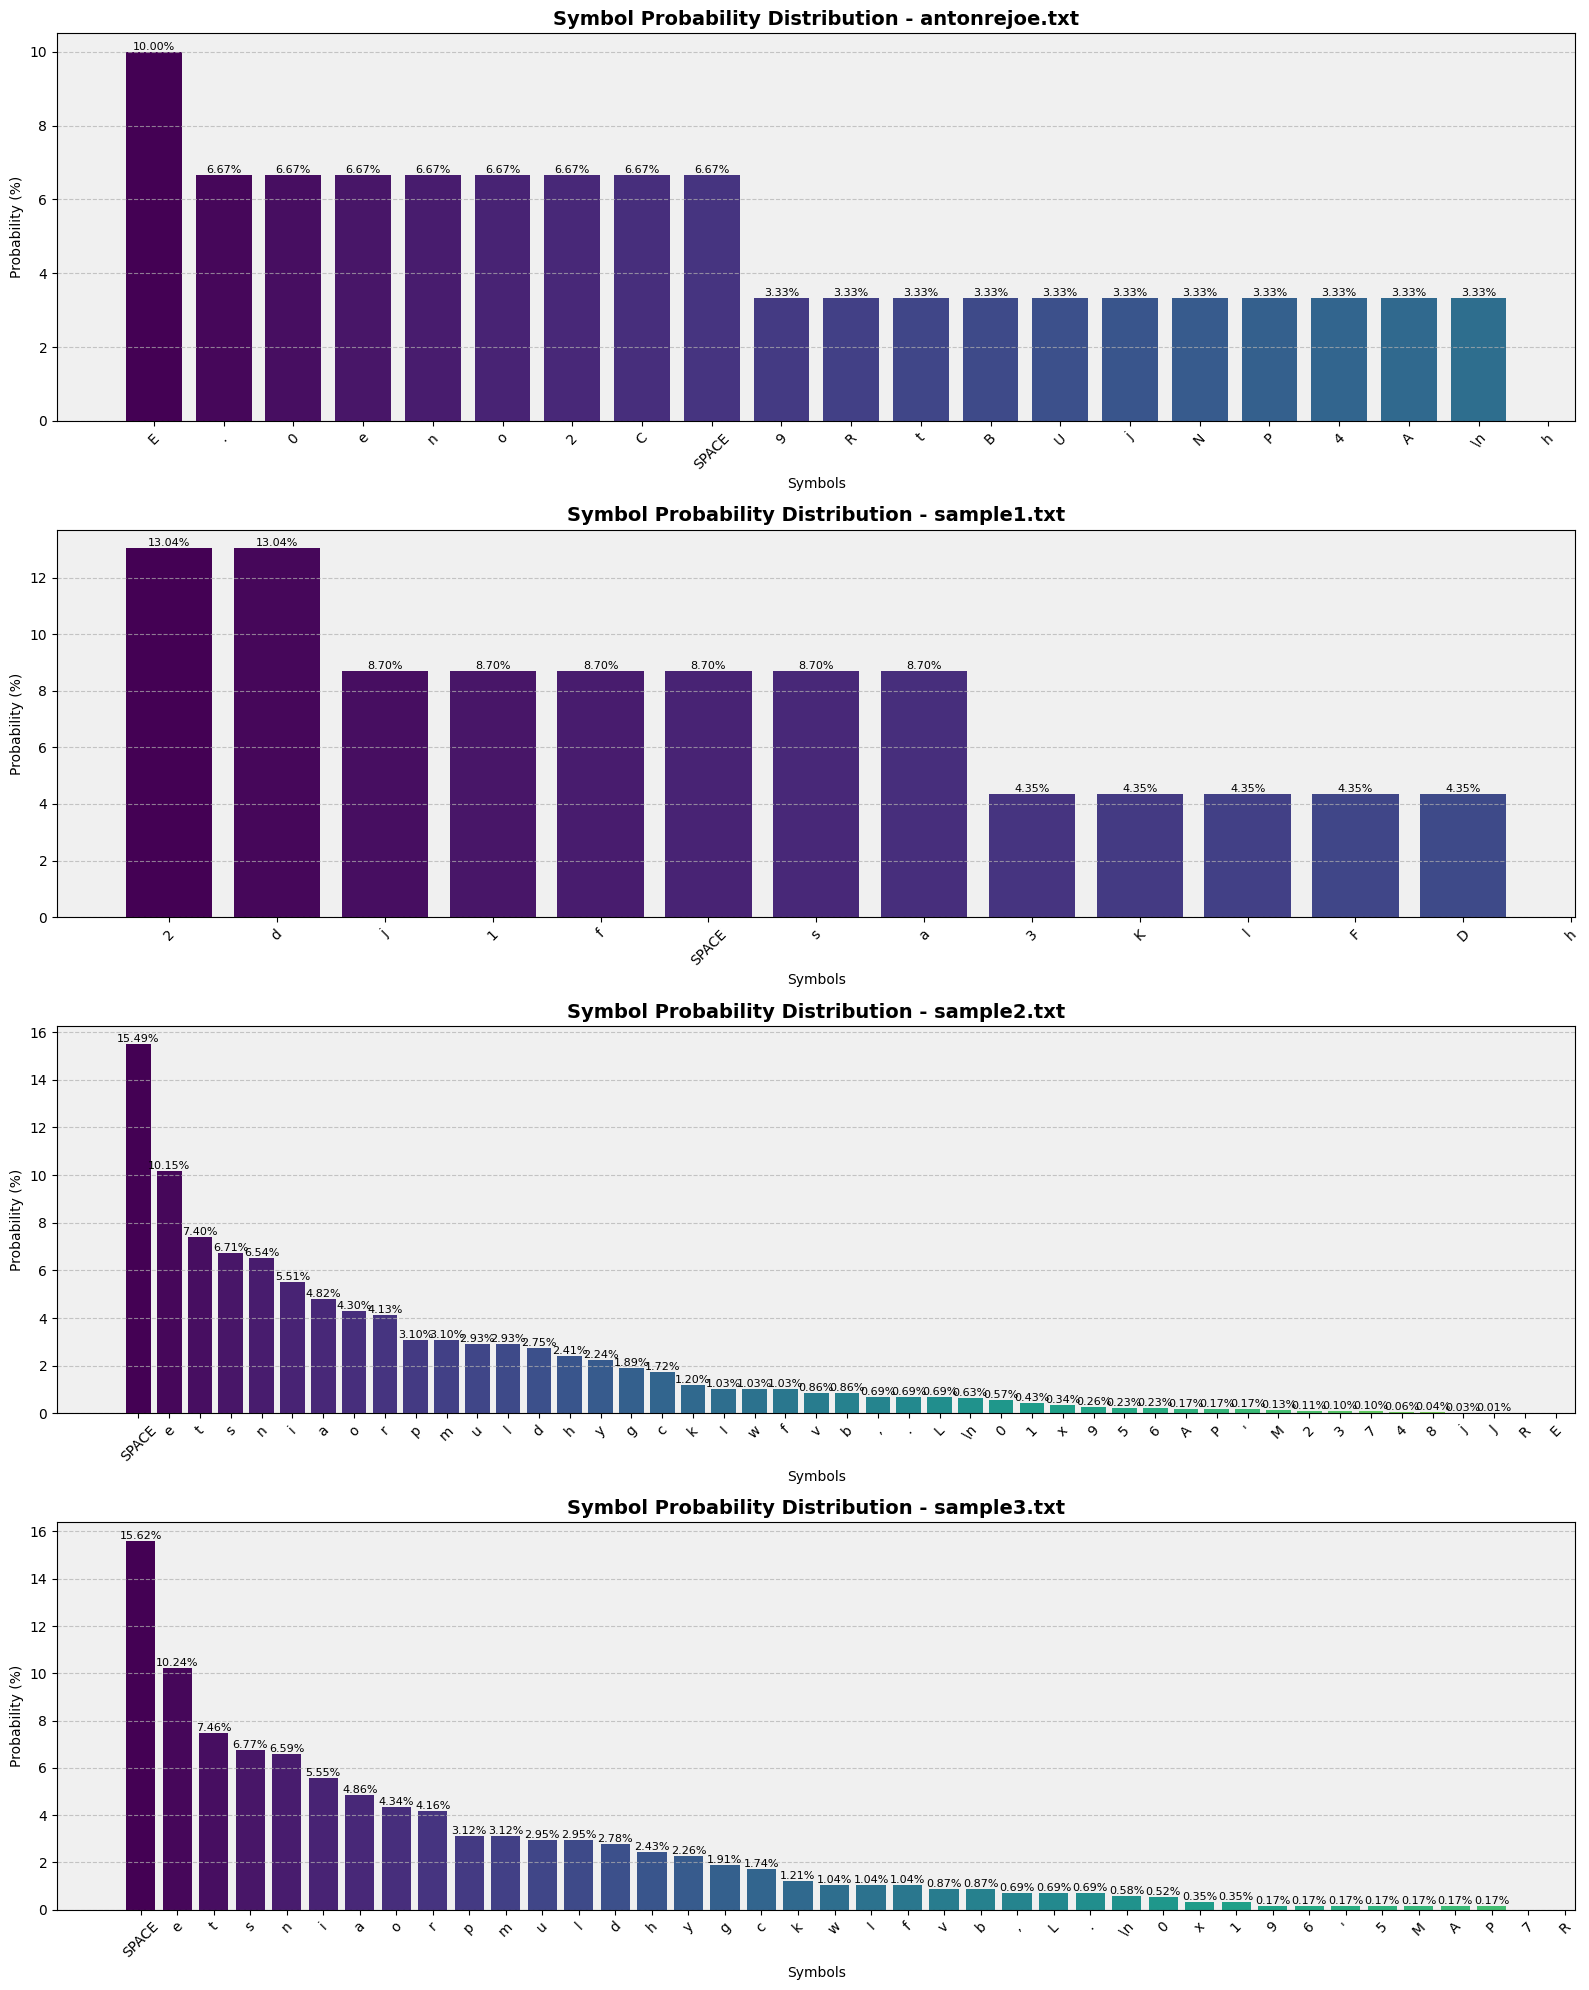

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_symbol_probabilities(df, top_n=100):
    """
    Clean and Beautiful Symbol Probability Visualization
    Handles multiple rows in CSV with filename-specific subplots
    """
    # Preprocess DataFrame
    symbol_columns = df.columns[5:]
    symbol_df = df[symbol_columns].apply(pd.to_numeric, errors='coerce')
    
    # Print total rows and symbols
    print(f"Total Rows in DataFrame: {len(df)}")
    print(f"Total Unique Symbols: {len(symbol_columns)}")
    
    # Create figure with subplots for each filename
    fig, axes = plt.subplots(len(df), 1, figsize=(16, 5*len(df)))
    
    # Ensure axes is always a list
    if len(df) == 1:
        axes = [axes]
    
    for row_idx, row in df.iterrows():
        filename = row['Filename']
        
        # Compute probabilities for this row
        current_probs = row[symbol_columns].apply(pd.to_numeric, errors='coerce')
        
        # Sort probabilities in descending order
        sorted_probs = current_probs.sort_values(ascending=False)
        
        # Select top N symbols
        top_symbols = sorted_probs.head(top_n)
        
        # Color palette
        colors = plt.cm.viridis(np.linspace(0, 1, len(top_symbols)))
        
        # Bar Plot with Enhanced Aesthetics
        bars = axes[row_idx].bar(top_symbols.index, top_symbols.values, color=colors)
        
        # Title and labels for each subplot
        axes[row_idx].set_title(f'Symbol Probability Distribution - {filename}', 
                                 fontsize=14, fontweight='bold')
        axes[row_idx].set_xlabel('Symbols', fontsize=10)
        axes[row_idx].set_ylabel('Probability (%)', fontsize=10)
        axes[row_idx].tick_params(axis='x', rotation=45)
        axes[row_idx].grid(axis='y', linestyle='--', alpha=0.7)
        
        # Add value labels on top of each bar
        for bar in bars:
            height = bar.get_height()
            axes[row_idx].text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:.2f}%', 
                     ha='center', va='bottom', fontsize=8)
        
        # Subtle background
        axes[row_idx].set_facecolor('#f0f0f0')
    
    plt.tight_layout()
    plt.show()

# Read the CSV file
df = pd.read_csv('expanded_symbol_probabilities.csv')

# Plot Symbol Probabilities
plot_symbol_probabilities(df)


Total Rows in DataFrame: 4
Total Unique Symbols: 54


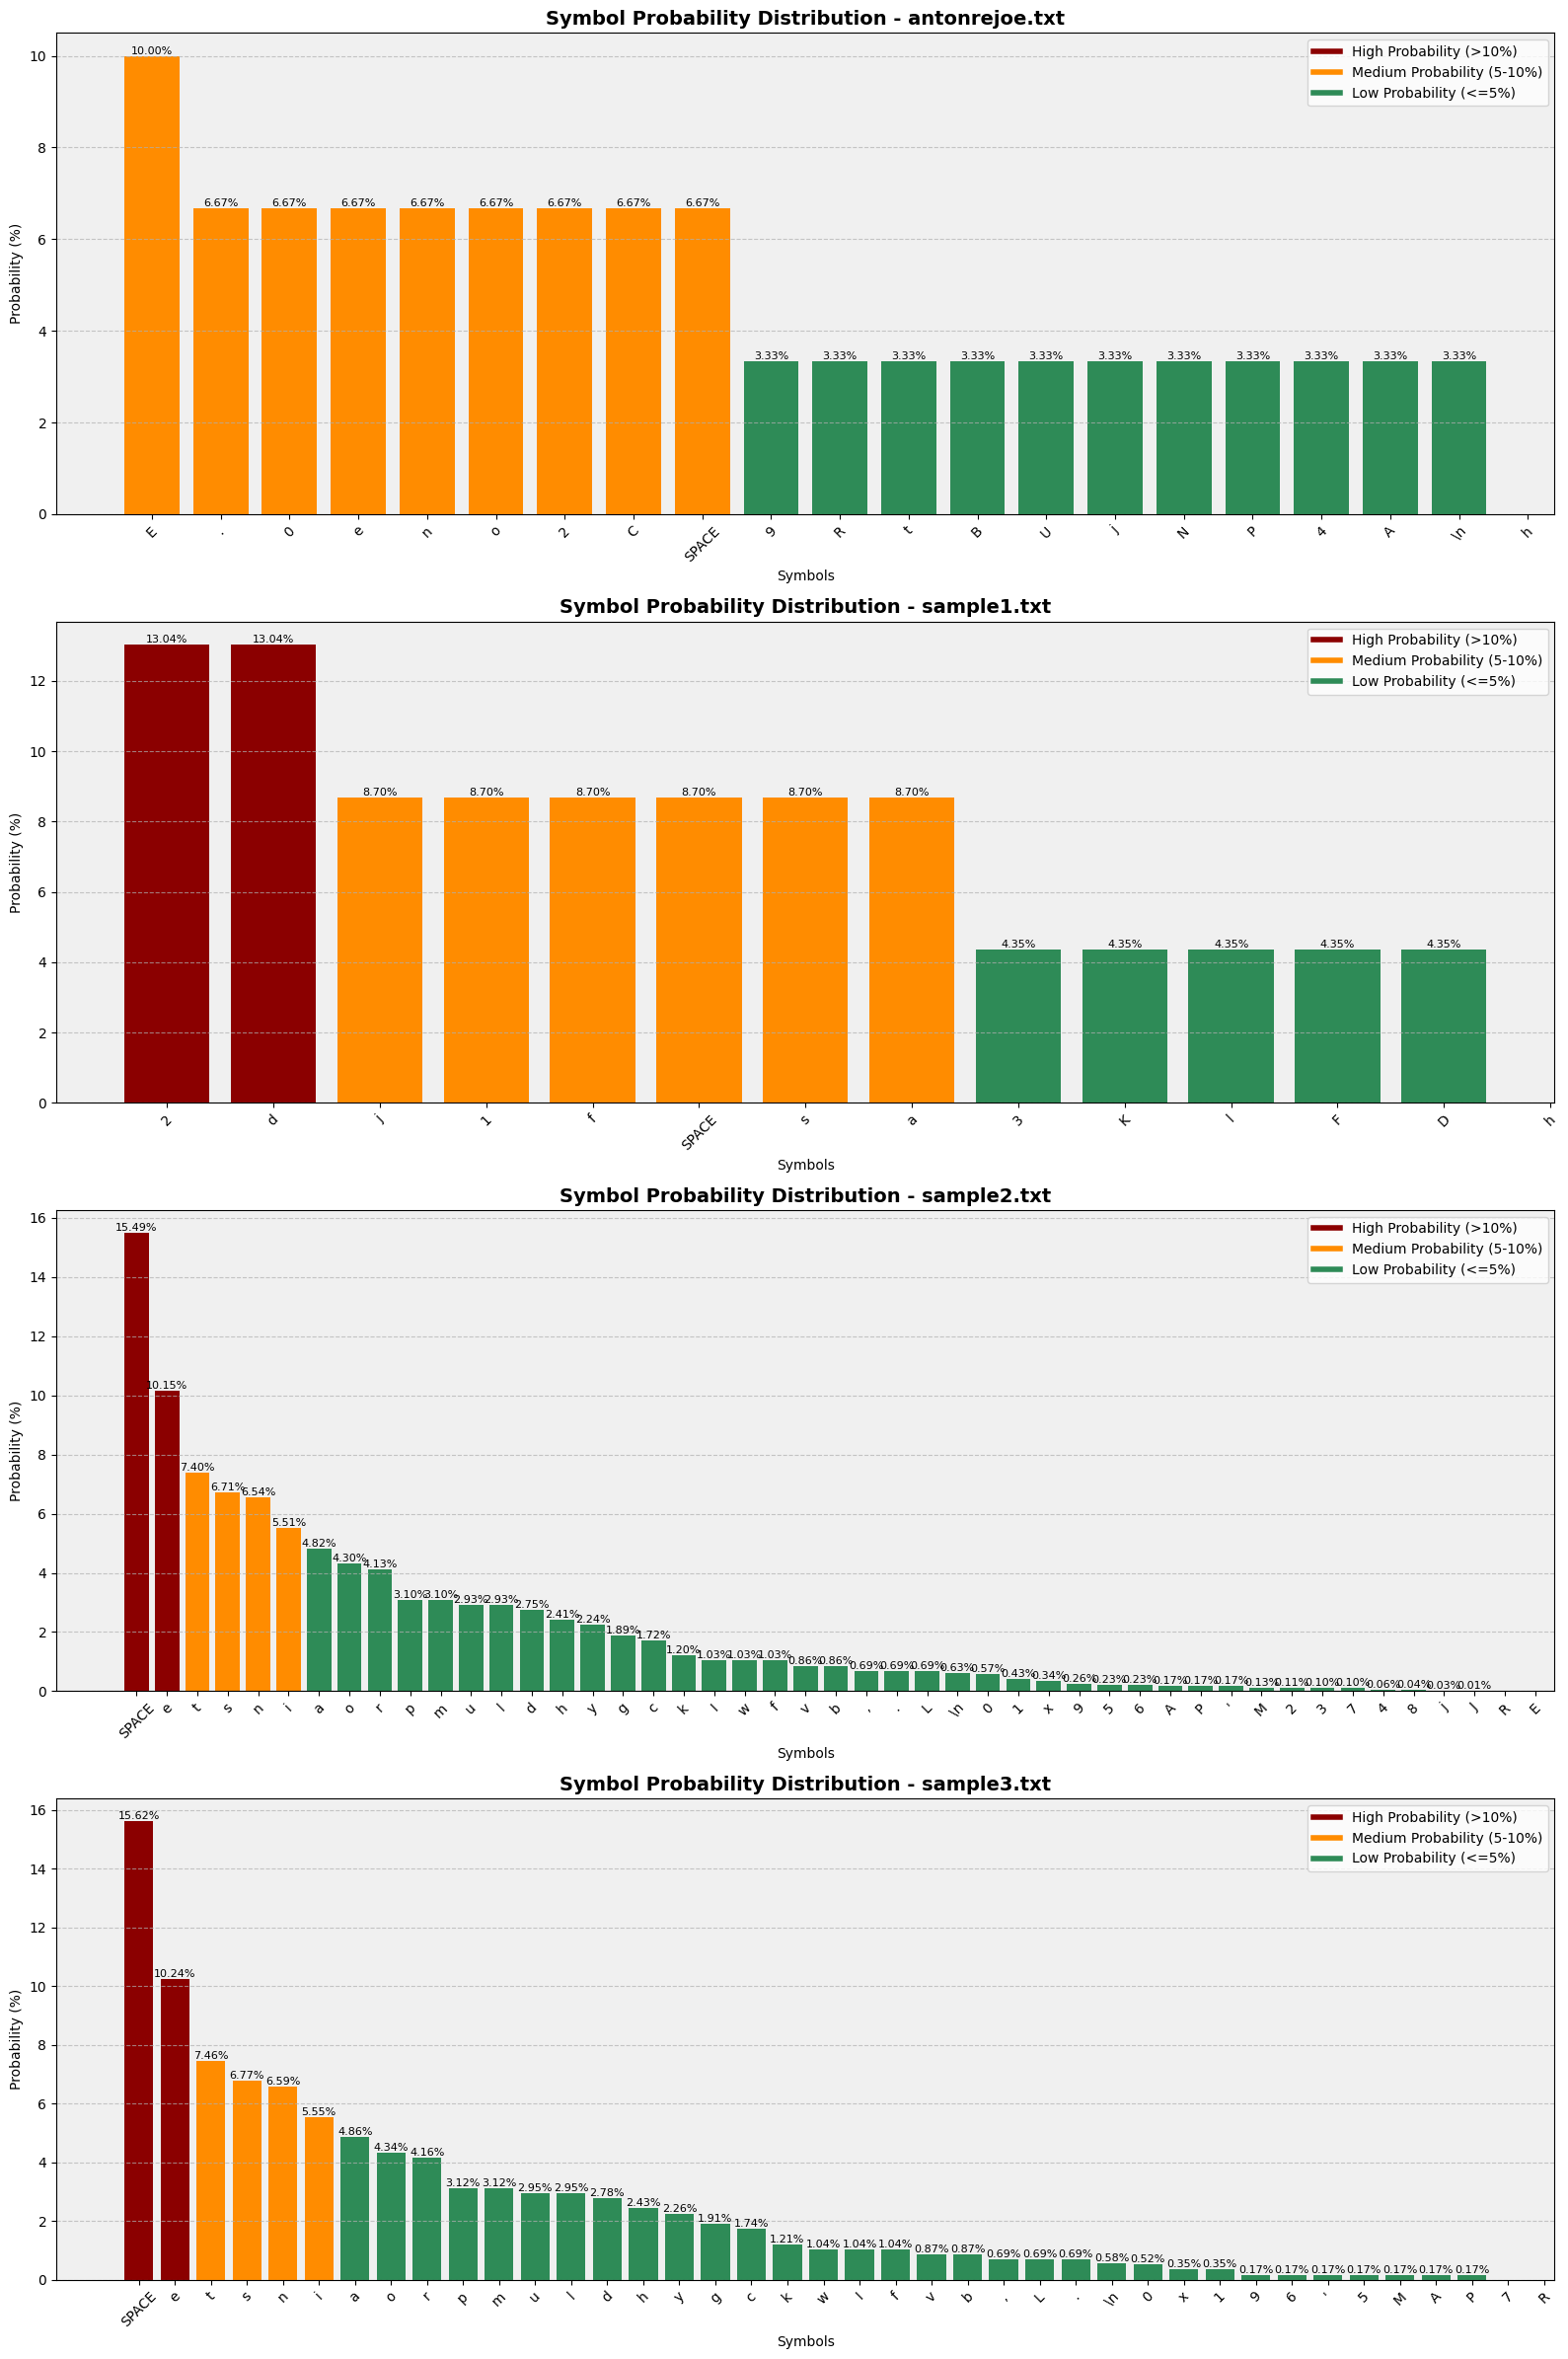

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_symbol_probabilities_color_coded(df, top_n=100):
    """
    Visualizes Symbol Probability Distribution with Color-Coded Groups
    """
    # Preprocess DataFrame
    symbol_columns = df.columns[5:]
    symbol_df = df[symbol_columns].apply(pd.to_numeric, errors='coerce')
    
    # Print total rows and symbols
    print(f"Total Rows in DataFrame: {len(df)}")
    print(f"Total Unique Symbols: {len(symbol_columns)}")
    
    # Create figure with subplots for each filename
    fig, axes = plt.subplots(len(df), 1, figsize=(16, 6 * len(df)))
    
    # Ensure axes is always a list
    if len(df) == 1:
        axes = [axes]
    
    for row_idx, row in df.iterrows():
        filename = row['Filename']
        
        # Compute probabilities for this row
        current_probs = row[symbol_columns].apply(pd.to_numeric, errors='coerce')
        
        # Sort probabilities in descending order
        sorted_probs = current_probs.sort_values(ascending=False)
        
        # Select top N symbols
        top_symbols = sorted_probs.head(top_n)
        
        # Assign color groups based on probability ranges
        color_groups = []
        for prob in top_symbols.values:
            if prob > 10:  # High probability
                color_groups.append('darkred')
            elif 5 < prob <= 10:  # Medium probability
                color_groups.append('darkorange')
            else:  # Low probability
                color_groups.append('seagreen')
        
        # Bar Plot with Color-Coded Groups
        bars = axes[row_idx].bar(top_symbols.index, top_symbols.values, color=color_groups)
        
        # Title and labels for each subplot
        axes[row_idx].set_title(f'Symbol Probability Distribution - {filename}', 
                                 fontsize=14, fontweight='bold')
        axes[row_idx].set_xlabel('Symbols', fontsize=10)
        axes[row_idx].set_ylabel('Probability (%)', fontsize=10)
        axes[row_idx].tick_params(axis='x', rotation=45)
        axes[row_idx].grid(axis='y', linestyle='--', alpha=0.7)
        
        # Add value labels on top of each bar
        for bar in bars:
            height = bar.get_height()
            axes[row_idx].text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:.2f}%', 
                     ha='center', va='bottom', fontsize=8)
        
        # Subtle background
        axes[row_idx].set_facecolor('#f0f0f0')
        
        # Add legend for color groups
        custom_legend = [
            plt.Line2D([0], [0], color='darkred', lw=4, label='High Probability (>10%)'),
            plt.Line2D([0], [0], color='darkorange', lw=4, label='Medium Probability (5-10%)'),
            plt.Line2D([0], [0], color='seagreen', lw=4, label='Low Probability (<=5%)')
        ]
        axes[row_idx].legend(handles=custom_legend, loc='upper right', fontsize=10)
    
    plt.tight_layout()
    plt.show()

# Read the CSV file
df = pd.read_csv('expanded_symbol_probabilities.csv')

# Plot Symbol Probabilities with Color-Coded Groups
plot_symbol_probabilities_color_coded(df)


In [ ]:
import numpy as np
import pandas as pd

def binary_to_binary_csv(binary_file, csv_file):
    """
    Convert binary file to binary (0/1) CSV
    
    Args:
        binary_file (str): Path to input binary file
        csv_file (str): Path to output CSV file
    """
    # Read binary file as uint8 (byte) data
    binary_data = np.fromfile(binary_file, dtype=np.uint8)
    
    # Convert bytes to binary representation
    binary_strings = [format(byte, '08b') for byte in binary_data]
    
    # Create DataFrame with binary digits
    binary_df = pd.DataFrame([list(map(int, list(binary_str))) for binary_str in binary_strings])
    
    # Save to CSV
    binary_df.to_csv(csv_file, index=False, header=False)
    
    print(f"Converted {binary_file} to binary CSV: {csv_file}")
    print(f"Shape of binary data: {binary_df.shape}")

# Example usage
binary_file = 'encoded/sample1.bin'
csv_file = f'binary{3}.csv'
binary_to_binary_csv(binary_file, csv_file)


Converted encoded/antonrejoe.bin to binary CSV: binary3.csv
Shape of binary data: (17, 8)


In [12]:
import heapq
import csv

class Node:
    def __init__(self, char, freq):
        self.char = char
        self.freq = freq
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.freq < other.freq

def build_huffman_tree(freqs):
    heap = [Node(char, freq) for char, freq in freqs.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)
        merged = Node(None, left.freq + right.freq)
        merged.left, merged.right = left, right
        heapq.heappush(heap, merged)
    
    return heap[0]

def generate_codes(node, prefix="", codebook={}):
    if node:
        if node.char:
            codebook[node.char] = prefix
        generate_codes(node.left, prefix + "0", codebook)
        generate_codes(node.right, prefix + "1", codebook)
    return codebook

def parse_probabilities(prob_str):
    prob_str = prob_str.replace("SPACE", " ").replace("\\n", "\n")
    freqs = {}
    for item in prob_str.strip().split(";"):
        if item:
            char, prob = item.split(":")
            freqs[char.strip()] = float(prob.strip().replace("%", "")) / 100
    return freqs

def encode_input(input_text, codebook):
    return ''.join(codebook.get(char, '') for char in input_text)

def process_csv(file_path):
    file_info = []
    
    with open(file_path, mode='r') as file:
        reader = csv.reader(file)
        header = next(reader)  # Skip the header row

        for row in reader:
            filename = row[0]
            symbol_probabilities = row[5].strip()  # Strip extra spaces or newlines

            freqs = parse_probabilities(symbol_probabilities)
            root = build_huffman_tree(freqs)
            codebook = generate_codes(root)
            
            file_info.append({
                "Filename": filename,
                "Symbol Probabilities": symbol_probabilities,
                "Huffman Codebook": codebook
            })
    
    return file_info

# Example usage with your CSV file path
file_path = 'compression_metrics.csv'  # Replace with your CSV file path
file_data = process_csv(file_path)

# Print the extracted file information and Huffman codebook for each file
for info in file_data:
    print(f"Filename: {info['Filename']}")
    print(f"Symbol Probabilities: {info['Symbol Probabilities']}")
    print(f"Huffman Codebook: {info['Huffman Codebook']}")
    print()

    # Example of encoding a given input using the generated Huffman codebook
    input_text = "hello world"
    encoded = encode_input(input_text, info['Huffman Codebook'])
    print(f"Encoded '{input_text}': {encoded}\n")


Filename: antonrejoe.txt
Symbol Probabilities: B:3.333333%; C:6.666667%; P:3.333333%; j:3.333333%; 0:6.666667%; \n:3.333333%; e:6.666667%; 9:3.333333%; 2:6.666667%; U:3.333333%; .:6.666667%; N:3.333333%; A:3.333333%; E:10.000000%; o:6.666667%; R:3.333333%; 4:3.333333%; n:6.666667%; SPACE:6.666667%; t:3.333333%;
Huffman Codebook: {'o': '0100', 'E': '001', '4': '0100110100', 'R': '01001', 'P': '101011101', 'B': '01011', 'A': '101011111', 'N': '01101', 'j': '010011010111', '9': '00110010', 'U': '10000', 't': '000', '0': '0011000', 'e': '011', '2': '000001010', 'n': '1101', '.': '1010100', 'C': '1111', 'a': '0101', 'f': '001101', 'd': '10100', 'K': '1010', '3': '0110111000', 'l': '10110', 's': '1110', '1': '00110011', 'D': '11110', 'F': '11111', 'w': '1111111', '5': '101011011', 'M': '101011010', 'y': '00111', 'h': '10000', 'k': '100010', '8': '01001101010', 'J': '010011010110', "'": '101011100', 'x': '10101100', 'i': '1001', ',': '1010101', 'L': '1000111', '7': '0110111001', '6': '1010111